In [ ]:
import gym
from gym.spaces import Discrete, Box
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
import cv2
import io
import base64
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import copy

In [ ]:
class snake(gym.Env):
    
    def __init__(self):
        self.action_space = Discrete(4)
        self.videos_images = []
        self.snake_max_len = 100
        self.snake_starting_length = 1
        self.snake_length = 1
        self.rows = 5
        self.columns = 5
        self.moves = [(1, 0), (0, 1), (-1, 0), (0, -1)] # 0 is down, 1 is right, 2 is up, 3 is left
        self.default_board_environment = np.zeros((self.rows, self.columns))
        self.board_state = self.default_board_environment
        self.head_location = 0
        self.apple_location = 0
        self.videos = [('/content/snake.mp4', '/content/snake.meta.json')]
    
    def render_video(self):
        lists = board.tolist()
        for n in range(len(lists)):
            lister = lists[n]
            for i in range(len(lister)):
                item = lister[i]
                done = False
                if item == 0:
                    lister[i] = [0, 0, 0]
                    done = True
                if item == 1000:
                    lister[i] = [255, 0, 0]
                    done = True
                if item == 100:
                    lister[i] = [0, 0, 244]
                if done == False:
                    lister[i] = [192, 192, 192]
            lists[n] = lister
        self.videos_images.append(lists)

    def write_video(self):
        fig, ax = plt.subplots()
        ims = []
        for i in range(len(self.videos_images)):
            im = ax.imshow(self.videos_images[i], animated=True)
            if i == 0:
                ax.imshow(self.videos_images[i])
            ims.append([im])
        ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                        repeat_delay=1000)
        ani.save('snake.mp4')
        plt.close()
        

    def step(self, action):
        done = False
        #Get Move
        move = self.moves[action]
        #Make Move
        snake_loc = self.snake_location
        reward = -0.05
        cont = True
        moving = True
        new_length = False
        if (snake_loc[0]+move[0]) >= self.rows:
            cont = False
        elif (snake_loc[0] + move[0]) < 0:
            cont = False
        if (snake_loc[1]+move[1]) >= self.columns:
            cont = False
        elif (snake_loc[1]+move[1]) < 0:
            cont = False
        if cont == True:
            new_space = self.board_state[(snake_loc[0]+move[0]), (snake_loc[1]+move[1])]
            if new_space == 1000:
                done = True
                reward = 1
                new_length = True
            if done == False:
                if new_space != 0:
                    if new_space != (self.snake_max_len - self.snake_length):
                        done = True
                        reward = -1
        else:
            moving = False
            done = True
            reward = -1
        if moving == True:
            moved_snake = False
            self.board_state[(snake_loc[0]+move[0]), (snake_loc[1]+move[1])] = self.snake_max_len
            count = self.snake_length
            while moved_snake == False:
                if (self.snake_max_len - count) <= (self.snake_max_len - self.snake_length):
                    if new_length == True:
                        find = np.where(self.board_state == (self.snake_max_len-count))
                        self.board_state[find[0], find[1]] -= 1
                    else:
                        find = np.where(self.board_state == (self.snake_max_len-count))
                        self.board_state[find[0], find[1]] = 0
                else:
                    find = np.where(self.board_state == (self.snake_max_len-count))
                    self.board_state[find[0], find[1]] -= 1
                if count == 1:
                    moved_snake = True
                count -= 1
            if self.snake_length != 1:
                self.board_state[(snake_loc[0]), (snake_loc[1])] -=1
            else:
                self.board_state[(snake_loc[0], (snake_loc[1]))] = 0
            self.snake_location = [(snake_loc[0]+move[0]), (snake_loc[1]+move[1])]
        self.render_video()
        
        if done == True:
            self.write_video()
        return self.board_state, reward, done
    
    def reset(self):
        rand_row = random.randint(0, (self.rows-1))
        rand_col = random.randint(0, (self.columns-1))
        #Set board space and apple
        self.board_state = self.default_board_environment
        self.board_state[rand_row, rand_col] = 1000
        self.apple_location = [rand_row, rand_col]
        #Set Snake Head location
        snake_loc = False
        while snake_loc == False:
            snake_row = random.randint(0, (self.rows-1))
            snake_col = random.randint(0, (self.columns-1))
            if self.board_state[snake_row, snake_col] != 1000:
                self.board_state[snake_row, snake_col] = self.snake_max_len
                snake_loc = True
                self.snake_location = [snake_row, snake_col]
        #Set Snake Body Location
        snake_length = 1
        snake_val = self.snake_max_len
        moves = self.moves
        snake_built = False
        last_row = snake_row
        last_col = snake_col
        if snake_length == self.snake_starting_length:
            snake_built = True
        while snake_built == False:
            viable_space = []
            for move in moves:
                viable = True
                if (last_row + move[0]) < 0:
                    viable = False
                else:
                    if (last_row + move[0]) >= self.rows:
                        viable = False
                if (last_col + move[1]) < 0:
                    viable = False
                else:
                    if (last_col + move[1]) >= self.columns:
                        viable = False
                if viable == True:
                    if self.board_state[(last_row+move[0]), (last_col+move[1])] != 0:
                        viable = False
                    if viable == True:
                        viable_space.append(move)
            if len(viable_space) == 0:
                breakpoint()
            rand_move = viable_space[random.randint(0, (len(viable_space)-1))]
            last_row = last_row + rand_move[0]
            last_col = last_col + rand_move[1]
            snake_val -= 1
            self.board_state[last_row, last_col] = snake_val
            if snake_val <= (self.snake_max_len - self.snake_starting_length):
                snake_built = True
        self.snake_length = self.snake_starting_length
        return self.board_state
    
    def render(self, mode='human', close=False):
        pass
    
    def close(self):
        pass

#Gradient Decent Sarsa

#Sarsa(0)


In [ ]:
class Sarsa0_model():
  def __init__(self):
      self.theta = np.random.randn(25) / np.sqrt(25)
  
  def s(self, s, a):
      return np.array([
      s[0]/100                      if a == 0 else 0,
      s[1]/100                      if a == 0 else 0,
      s[0]*s[1]/100                 if a == 0 else 0,
      s[0]*s[0]/100                 if a == 0 else 0,
      s[1]*s[1]/100                 if a == 0 else 0,
      1                             if a == 0 else 0,
      s[0]/100                      if a == 1 else 0,
      s[1]/100                      if a == 1 else 0,
      s[0]*s[1]/100                 if a == 1 else 0,
      s[0]*s[0]/100                 if a == 1 else 0,
      s[1]*s[1]/100                 if a == 1 else 0,
      1                             if a == 1 else 0,
      s[0]/100                      if a == 2 else 0,
      s[1]/100                      if a == 2 else 0,
      s[0]*s[1]/100                 if a == 2 else 0,
      s[0]*s[0]/100                 if a == 2 else 0,
      s[1]*s[1]/100                 if a == 2 else 0,
      1                             if a == 2 else 0,
      s[0]/100                      if a == 3 else 0,
      s[1]/100                      if a == 3 else 0,
      s[0]*s[1]/100                 if a == 3 else 0,
      s[0]*s[0]/100                 if a == 3 else 0,
      s[1]*s[1]/100                 if a == 3 else 0,
      1                             if a == 3 else 0,
      1
    ])
  
  def pred(self, s, a):
      x = self.s(s, a)
      return self.theta.dot(x)
  
  def gradiant(self, s, a):
      return self.s(s, a)


In [ ]:
def get_coordinates(board):
    apple = (int(np.argmax(board)/10), np.argmax(board)%10)
    snake = np.where(board==100)
    snake = (snake[0][0], snake[1][0])
    return apple, snake

In [ ]:
def actions_allowed(s, a):

    action_dictionary = {0:(1, 0),
                         1:(0, 1),
                         2:(-1, 0),
                         3:(0, -1)}
    
    new_loc = np.array(s) + np.array(action_dictionary[a])

    check = True

    if new_loc[0] < 0 or new_loc[0] > 4:
        check = False
    
    if new_loc[1] < 0 or new_loc[1] > 4:
        check = False

    return check

In [ ]:
def Q_vals(m, s):
  actions = [0, 1, 2, 3]
  q = {}
  for act in actions:
      if actions_allowed(s, act):
          q_v = m.pred(s, act)
          q[act] = q_v
  return q

In [ ]:
def best_action(q):
  best = [np.NaN]
  
  for key in q.keys():
      val = q[key]
      if np.isnan(best[0]):
          best = [key]
      else:
          if val > q[np.max(best)]:
              best = [key]
          elif val == q[np.max(best)]:
              best.append(key)
      
  best = random.choice(best)
  return best

In [ ]:
def epsilon_greedy(s, a, epsilon):
    rand = random.uniform(0, 1)
    if (1-epsilon) > rand:
       return a 
    else: 
      check = False
      check_count = 0
      while check == False:
          choice = random.choice([0, 1, 2, 3])
          check = actions_allowed(s, choice)
          check_count += 1
          if check_count == 100:
            pdb.set_trace()
      return choice

In [ ]:
env = snake()

board = env.reset()

apple_coordinates, snake_coordinates = get_coordinates(board)

In [ ]:
print(f'Snake Coordinates: {snake_coordinates}')
print(f'Apple Coordinates: {apple_coordinates}')

Snake Coordinates: (2, 2)
Apple Coordinates: (0, 4)


In [ ]:
copy_env = copy.deepcopy(env)

In [ ]:
import pdb
import gc

In [ ]:
a = 0.1
g = 0.8
epsilon = 1

eps = 100
eps_decay = 0.015
min_eps = 0

average_rewards = []

mod = Sarsa0_model()
print('Original Weight Initialisations')
print(mod.theta)

for i in range(eps):
    epsilon = np.max([min_eps, (epsilon-eps_decay)])

    env = copy.deepcopy(copy_env)

    apple, state = get_coordinates(board)
    q_vals = Q_vals(mod, state)

    action = best_action(q_vals)
    action = epsilon_greedy(state, action, epsilon)
    
    done = False
    
    count = 0
    total_reward = 0
    stop = False
    
    while done == False:
        board, reward, done = env.step(action)
        apple, state_2 = get_coordinates(board)
        
        count += 1
        total_reward += reward
        
        if done == True:
            mod.theta += a*(reward - mod.pred(state, action))*mod.gradiant(state, action)
            average_rewards.append(total_reward/count)
        else:
            q_vals2 = Q_vals(mod, state_2)
            action_2 = best_action(q_vals2)
            max = q_vals2[action_2]
            action_2 = epsilon_greedy(state_2, action_2, epsilon)
            
            prev_weights = copy.deepcopy(mod.theta)
            mod.theta += a*(reward + g*max - mod.pred(state, action))*mod.gradiant(state, action)

            state = state_2
            action = action_2
    
    print(f'Episode {i} complete!')
    
    gc.collect()


for f in env.videos:
    video = io.open(f[0], 'r+b').read()
    encoded = base64.b64encode(video)

    display.display(display.HTML(data="""
        <video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
        </video>
        """.format(encoded.decode('ascii'))))

print('Weights after training:')
print(mod.theta)


Original Weight Initialisations
[-0.40776626  0.04396261 -0.18803026  0.16039629  0.01031447  0.48877887
 -0.15344682  0.03479187  0.03921892 -0.03004842 -0.00817728 -0.24548813
 -0.17809443 -0.20681954 -0.13904612  0.11678475  0.22634905  0.09334287
  0.12818579  0.0526098   0.15057765 -0.02620558  0.09529207 -0.23268063
 -0.16430974]
Episode 0 complete!
Episode 1 complete!
Episode 2 complete!
Episode 3 complete!
Episode 4 complete!
Episode 5 complete!
Episode 6 complete!
Episode 7 complete!
Episode 8 complete!
Episode 9 complete!
Episode 10 complete!
Episode 11 complete!
Episode 12 complete!
Episode 13 complete!
Episode 14 complete!
Episode 15 complete!
Episode 16 complete!
Episode 17 complete!
Episode 18 complete!
Episode 19 complete!
Episode 20 complete!
Episode 21 complete!
Episode 22 complete!
Episode 23 complete!
Episode 24 complete!
Episode 25 complete!
Episode 26 complete!
Episode 27 complete!
Episode 28 complete!
Episode 29 complete!
Episode 30 complete!
Episode 31 complete!


Weights after training:
[-0.41494033  0.03562575 -0.20352508  0.14278407 -0.01177595  0.0717675
 -0.20165537  0.07316105 -0.07648246 -0.15932929  0.138992    0.26490761
 -0.22414905 -0.15355845 -0.21365266 -0.06402445  0.52035355  0.16786819
  0.1336555   0.05706252  0.15639749 -0.010393    0.10331873  0.04477069
  0.28105127]


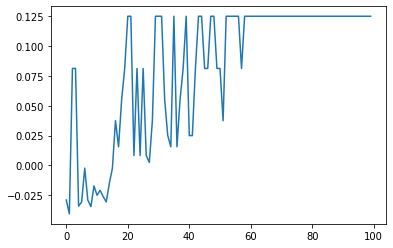

In [ ]:
plt.plot(average_rewards)
plt.show()

#Sarsa with Linear Function Approximation

In [ ]:
class Sarsa_Lambda_model():
  def __init__(self, rows, columns, actions):
      self.rows = rows
      self.columns = columns
      self.theta = np.random.randn(rows+columns+actions) / np.sqrt(25)
  
  def s(self, s, a):
      columns = np.array([0 for _ in range(self.columns)])
      rows = np.array([0 for _ in range(self.rows)])
      action = np.array([0 for _ in range(4)])

      columns[s[0]] = 1
      rows[s[1]] = 1
      action[a] = 1

      combine = np.append(columns, rows)
      combine = np.append(combine, action)

      return combine
  
  def pred(self, s, a):
      x = self.s(s, a)
      return self.theta.dot(x)
  
  def features(self, s, a):
      return self.s(s, a)

  def reset_z(self):
      self.z = np.array([0 for _ in range(len(self.theta))])



In [ ]:
a = 0.1
g = 0.8
trace = 0.8
epsilon = 1

eps = 100
eps_decay = 0.015
min_eps = 0

average_rewards = []

mod = Sarsa_Lambda_model(5, 5, 4)
print('Original Weight Initialisations')
print(mod.theta)

for i in range(eps):
    epsilon = np.max([min_eps, (epsilon-eps_decay)])

    env = copy.deepcopy(copy_env)

    apple, state = get_coordinates(board)
    q_vals = Q_vals(mod, state)

    action = best_action(q_vals)
    action = epsilon_greedy(state, action, epsilon)
    
    done = False
    
    count = 0
    total_reward = 0
    
    mod.reset_z()

    while done == False:
        board, reward, done = env.step(action)
        apple, state_2 = get_coordinates(board)
        
        count += 1
        total_reward += reward
        
        delta = reward - mod.pred(state, action)

        features = mod.features(state, action)
        
        for _ in range(len(features)):
            if features[_] == 1:
                mod.z[_] = 1
        
        if done == True:
            mod.theta += a*delta*mod.z
            average_rewards.append(total_reward/count)
        else:
            q_vals2 = Q_vals(mod, state_2)
            action_2 = best_action(q_vals2)
            max = q_vals2[action_2]
            action_2 = epsilon_greedy(state_2, action_2, epsilon)
            
            delta += g*mod.pred(state_2, action_2)

            mod.theta += a*delta*mod.z
            mod.z = g*trace*mod.z

            state = state_2
            action = action_2
    
    print(f'Episode {i} complete!')
    gc.collect()


for f in env.videos:
    video = io.open(f[0], 'r+b').read()
    encoded = base64.b64encode(video)

    display.display(display.HTML(data="""
        <video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
        </video>
        """.format(encoded.decode('ascii'))))

print('Weights after training:')
print(mod.theta)


Original Weight Initialisations
[-0.26346477  0.19965742 -0.15120853  0.19773392 -0.08488151  0.21633586
 -0.05686452  0.12514565 -0.15395538 -0.13572854  0.20887649  0.07454258
  0.02018627  0.06443682]
Episode 0 complete!
Episode 1 complete!
Episode 2 complete!
Episode 3 complete!
Episode 4 complete!
Episode 5 complete!
Episode 6 complete!
Episode 7 complete!
Episode 8 complete!
Episode 9 complete!
Episode 10 complete!
Episode 11 complete!
Episode 12 complete!
Episode 13 complete!
Episode 14 complete!
Episode 15 complete!
Episode 16 complete!
Episode 17 complete!
Episode 18 complete!
Episode 19 complete!
Episode 20 complete!
Episode 21 complete!
Episode 22 complete!
Episode 23 complete!
Episode 24 complete!
Episode 25 complete!
Episode 26 complete!
Episode 27 complete!
Episode 28 complete!
Episode 29 complete!
Episode 30 complete!
Episode 31 complete!
Episode 32 complete!
Episode 33 complete!
Episode 34 complete!
Episode 35 complete!
Episode 36 complete!
Episode 37 complete!
Episode 

Weights after training:
[ 0.23465786  0.19631996 -0.01721189 -0.20427614 -0.24636971 -0.24932679
 -0.16604916  0.02452749  0.24572624  0.25650296 -0.28530872  0.44196277
  0.45043611 -0.28782667]


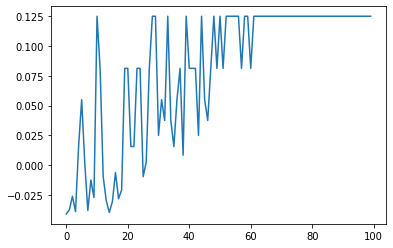

In [ ]:
plt.plot(average_rewards)
plt.show()